In [ ]:
from google.colab import files

images = files.upload()

Saving DatasetZip.zip to DatasetZip.zip


In [ ]:
import tensorflow

In [ ]:
! ls -hl
! unzip DatasetZip.zip

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
my_augmented_generator = ImageDataGenerator(
 
    rescale=1./255,
    fill_mode='nearest')

In [ ]:
my_augmented_image_generator = my_augmented_generator.flow_from_directory( '/content/Dataset', target_size=(256,256), batch_size=128, class_mode='categorical')

Found 811 images belonging to 3 classes.


In [ ]:
import matplotlib.pyplot as plt
for my_batch in my_augmented_image_generator:
    # my_batch is a tuple with images and labels
    images = my_batch[0]
    labels = my_batch[1]
    break


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:


model = Sequential()
model.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
model.add( MaxPool2D(4, 4) )
model.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )

model.add( Flatten() )
model.add( Dense( 8, activation = 'relu' ) )
model.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model = 0

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 35, 35, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [ ]:
# When using generators, you can calculate precision, recall, F1-score, etc. using the following idea (roughly)
Y = [] # empty list of true labels
P = [] # empty list of predictions
for i in range(811):
   x, y = my_augmented_image_generator.next()
   p = model.predict(x)
   Y.extend(y)
   P.extend(p)


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y, p.round())
accuracy

0.5813953488372093

In [ ]:
model.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history = model.fit(images,labels,epochs = 128, batch_size = 64 )


Epoch 1/128
2/2 [==============================] - 2s 112ms/step - loss: 1.1273 - accuracy: 0.3828
Epoch 2/128
2/2 [==============================] - 0s 114ms/step - loss: 1.0864 - accuracy: 0.3750
Epoch 3/128
2/2 [==============================] - 0s 113ms/step - loss: 1.0820 - accuracy: 0.4219
Epoch 4/128
2/2 [==============================] - 0s 115ms/step - loss: 1.0815 - accuracy: 0.3828
Epoch 5/128
2/2 [==============================] - 0s 114ms/step - loss: 1.0741 - accuracy: 0.3828
Epoch 6/128
2/2 [==============================] - 0s 114ms/step - loss: 1.0583 - accuracy: 0.3828
Epoch 7/128
2/2 [==============================] - 0s 115ms/step - loss: 1.0445 - accuracy: 0.4141
Epoch 8/128
2/2 [==============================] - 0s 115ms/step - loss: 1.0267 - accuracy: 0.4609
Epoch 9/128
2/2 [==============================] - 0s 114ms/step - loss: 1.0103 - accuracy: 0.4844
Epoch 10/128
2/2 [==============================] - 0s 112ms/step - loss: 0.9926 - accuracy: 0.4375
Epoch 11/

{'verbose': 1, 'epochs': 128, 'steps': 2}


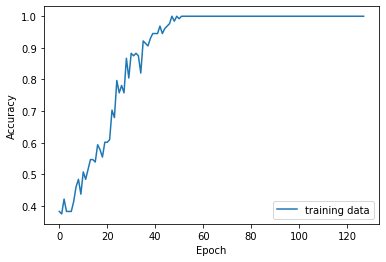

In [ ]:
print(history.params)
plt.plot(history.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
modell = 0

Overfitting the model by increasing the dense layer neurons instead of increasing conv2d to maintain as small architecture as possible - Achieved 82% Accuracy after 256 epochs

In [ ]:
modell = Sequential()

modell.add( Conv2D( 8, ( 3, 3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
modell.add( MaxPool2D(7, 7) )
modell.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
modell.add( MaxPool2D(7, 7) )
modell.add( Flatten() )
modell.add( Dense( 128, activation = 'relu' ) )
modell.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
modell.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_64 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_57 (MaxPoolin  (None, 21, 21, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_65 (Conv2D)          (None, 19, 19, 4)         292       
                                                                 
 max_pooling2d_58 (MaxPoolin  (None, 2, 2, 4)          0         
 g2D)                                                            
                                                                 
 flatten_25 (Flatten)        (None, 16)                0         
                                                                 
 dense_50 (Dense)            (None, 128)             

In [ ]:
modell.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
historyy1 = modell.fit(images,labels,epochs = 256, batch_size = 64 )


Epoch 1/256
13/13 [==============================] - 1s 28ms/step - loss: 1.0918 - accuracy: 0.3773
Epoch 2/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0770 - accuracy: 0.4303
Epoch 3/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0709 - accuracy: 0.4316
Epoch 4/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0644 - accuracy: 0.4303
Epoch 5/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0588 - accuracy: 0.4279
Epoch 6/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0539 - accuracy: 0.4501
Epoch 7/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0465 - accuracy: 0.4377
Epoch 8/256
13/13 [==============================] - 0s 21ms/step - loss: 1.0422 - accuracy: 0.4636
Epoch 9/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0361 - accuracy: 0.4760
Epoch 10/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0320 - accuracy: 0.4723

In [ ]:
model1 = 0

In [ ]:
model1 = Sequential()

model1.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model1.add( MaxPool2D(3, 3) )
model1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model1.add( MaxPool2D(3, 3) )
model1.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model1.add( MaxPool2D(3, 3) )
model1.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model1.add( Flatten() )
model1.add( Dense( 8, activation = 'relu' ) )
model1.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 47, 47, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 15, 15, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 13, 13, 4)         580       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 4)         

In [ ]:
model1.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history1 = model1.fit(images,labels,epochs = 128, batch_size = 64 )


Epoch 1/128
13/13 [==============================] - 1s 49ms/step - loss: 1.0949 - accuracy: 0.3095
Epoch 2/128
13/13 [==============================] - 1s 42ms/step - loss: 1.0875 - accuracy: 0.3995
Epoch 3/128
13/13 [==============================] - 1s 42ms/step - loss: 1.0825 - accuracy: 0.4316
Epoch 4/128
13/13 [==============================] - 1s 42ms/step - loss: 1.0787 - accuracy: 0.4316
Epoch 5/128
13/13 [==============================] - 1s 43ms/step - loss: 1.0740 - accuracy: 0.4303
Epoch 6/128
13/13 [==============================] - 1s 42ms/step - loss: 1.0735 - accuracy: 0.4291
Epoch 7/128
13/13 [==============================] - 1s 41ms/step - loss: 1.0763 - accuracy: 0.4291
Epoch 8/128
13/13 [==============================] - 1s 42ms/step - loss: 1.0722 - accuracy: 0.4303
Epoch 9/128
13/13 [==============================] - 1s 43ms/step - loss: 1.0668 - accuracy: 0.4328
Epoch 10/128
13/13 [==============================] - 1s 42ms/step - loss: 1.0652 - accuracy: 0.4390

{'verbose': 1, 'epochs': 128, 'steps': 13}


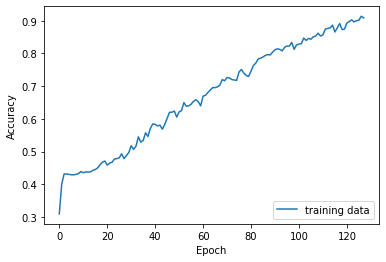

In [ ]:
print(history1.params)
plt.plot(history1.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model2 = 0
model2 = Sequential()

model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model2.add( MaxPool2D(3, 3) )
model2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
model2.add( MaxPool2D(3, 3) )
model2.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model2.add( MaxPool2D(3, 3) )
model2.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model2.add( Flatten() )
model2.add( Dense( 6, activation = 'relu' ) )
model2.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 47, 47, 16)        2320      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 15, 15, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 13, 13, 4)         580       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 4, 4, 4)         

In [ ]:
model2.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history2 = model2.fit(images,labels,epochs = 128, batch_size = 64 )

Epoch 1/128
13/13 [==============================] - 2s 48ms/step - loss: 1.0966 - accuracy: 0.3218
Epoch 2/128
13/13 [==============================] - 0s 31ms/step - loss: 1.0886 - accuracy: 0.3637
Epoch 3/128
13/13 [==============================] - 0s 30ms/step - loss: 1.0839 - accuracy: 0.4032
Epoch 4/128
13/13 [==============================] - 0s 31ms/step - loss: 1.0806 - accuracy: 0.4044
Epoch 5/128
13/13 [==============================] - 0s 31ms/step - loss: 1.0756 - accuracy: 0.4340
Epoch 6/128
13/13 [==============================] - 0s 31ms/step - loss: 1.0724 - accuracy: 0.4217
Epoch 7/128
13/13 [==============================] - 0s 31ms/step - loss: 1.0709 - accuracy: 0.4266
Epoch 8/128
13/13 [==============================] - 0s 32ms/step - loss: 1.0698 - accuracy: 0.4291
Epoch 9/128
13/13 [==============================] - 0s 30ms/step - loss: 1.0603 - accuracy: 0.4279
Epoch 10/128
13/13 [==============================] - 0s 32ms/step - loss: 1.0631 - accuracy: 0.4266

{'verbose': 1, 'epochs': 128, 'steps': 13}


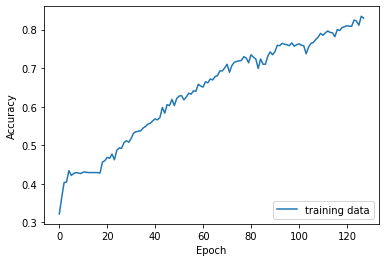

In [ ]:
print(history2.params)
plt.plot(history2.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model3 = 0

In [ ]:

model3 = Sequential()

model3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model3.add( MaxPool2D(3, 3) )
model3.add( Conv2D( 4, ( 3, 3 ), activation = 'relu' ) )
model3.add( MaxPool2D(3, 3) )
model3.add( Flatten() )
model3.add( Dense( 6, activation = 'relu' ) )
model3.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 49, 49, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 47, 47, 4)         1156      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 15, 15, 4)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 900)               0         
                                                                 
 dense_8 (Dense)             (None, 6)                

In [ ]:
model3.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history3 = model3.fit(images,labels,epochs = 150, batch_size = 64 )

Epoch 1/150
13/13 [==============================] - 1s 49ms/step - loss: 1.1004 - accuracy: 0.3428
Epoch 2/150
13/13 [==============================] - 1s 41ms/step - loss: 1.0946 - accuracy: 0.4291
Epoch 3/150
13/13 [==============================] - 1s 38ms/step - loss: 1.0867 - accuracy: 0.4291
Epoch 4/150
13/13 [==============================] - 1s 39ms/step - loss: 1.0800 - accuracy: 0.4291
Epoch 5/150
13/13 [==============================] - 1s 41ms/step - loss: 1.0774 - accuracy: 0.4291
Epoch 6/150
13/13 [==============================] - 1s 40ms/step - loss: 1.0753 - accuracy: 0.4291
Epoch 7/150
13/13 [==============================] - 1s 40ms/step - loss: 1.0747 - accuracy: 0.4291
Epoch 8/150
13/13 [==============================] - 1s 40ms/step - loss: 1.0724 - accuracy: 0.4291
Epoch 9/150
13/13 [==============================] - 1s 39ms/step - loss: 1.0687 - accuracy: 0.4291
Epoch 10/150
13/13 [==============================] - 1s 40ms/step - loss: 1.0651 - accuracy: 0.4291

{'verbose': 1, 'epochs': 150, 'steps': 13}


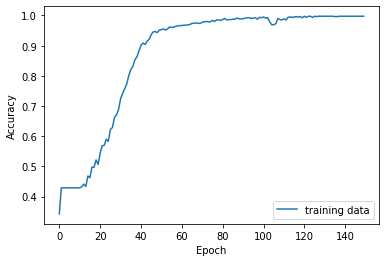

In [ ]:
print(history3.params)
plt.plot(history3.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
model4 = 0
model4 = Sequential()

model4.add( Conv2D( 16, ( 4, 4 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Conv2D( 8, ( 4, 4 ), activation = 'relu' ) )
model4.add( MaxPool2D(4, 4) )
model4.add( Flatten() )
model4.add( Dense( 6, activation = 'relu' ) )
model4.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 33, 33, 8)         2056      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 6)                

In [ ]:
model4.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history4 = model4.fit(images,labels,epochs = 150, batch_size = 64 )

Epoch 1/150
13/13 [==============================] - 1s 44ms/step - loss: 1.0849 - accuracy: 0.4192
Epoch 2/150
13/13 [==============================] - 0s 30ms/step - loss: 1.0707 - accuracy: 0.4353
Epoch 3/150
13/13 [==============================] - 0s 30ms/step - loss: 1.0680 - accuracy: 0.4402
Epoch 4/150
13/13 [==============================] - 0s 30ms/step - loss: 1.0581 - accuracy: 0.4451
Epoch 5/150
13/13 [==============================] - 0s 30ms/step - loss: 1.0465 - accuracy: 0.4439
Epoch 6/150
13/13 [==============================] - 0s 31ms/step - loss: 1.0290 - accuracy: 0.4525
Epoch 7/150
13/13 [==============================] - 0s 29ms/step - loss: 1.0165 - accuracy: 0.4957
Epoch 8/150
13/13 [==============================] - 0s 30ms/step - loss: 1.0122 - accuracy: 0.4834
Epoch 9/150
13/13 [==============================] - 0s 30ms/step - loss: 0.9907 - accuracy: 0.4982
Epoch 10/150
13/13 [==============================] - 0s 31ms/step - loss: 0.9825 - accuracy: 0.5191

{'verbose': 1, 'epochs': 150, 'steps': 13}


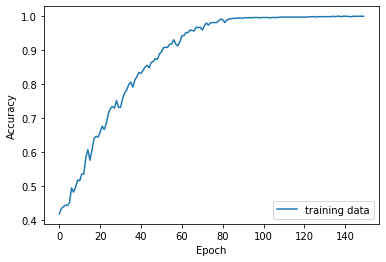

In [ ]:
print(history4.params)
plt.plot(history4.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
Y = []
P = []
for i in range(811):
   x, y = my_augmented_image_generator.next()
   p = model.predict(x)
   Y.extend(y)
   P.extend(p)

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(Y, p.round())

ValueError: ignored

In [ ]:

model7 = Sequential()

model7.add( Conv2D( 8, ( 3,3 ), activation = 'relu', input_shape = images[0, :, :, :].shape ) )
model7.add( MaxPool2D(5,5) )

model7.add( Conv2D( 4, ( 3,3 ), activation = 'relu' ) )
model7.add( MaxPool2D(5,5) )

model7.add( Flatten() )
model7.add( Dense( 4, activation = 'relu' ) )
model7.add( Dense( 3, activation = 'softmax' ) )

**Obtained 77% accuracy by the model with total params:945 ( Smallest one from my experiments)**

In [ ]:
model7.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 29, 29, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 27, 27, 4)         292       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 4)          0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 100)               0         
                                                                 
 dense_22 (Dense)            (None, 4)               

In [ ]:
model7.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
history7 = model7.fit(images,labels,epochs = 256, batch_size = 64 )

Epoch 1/256
13/13 [==============================] - 1s 45ms/step - loss: 1.1588 - accuracy: 0.3354
Epoch 2/256
13/13 [==============================] - 0s 27ms/step - loss: 1.1043 - accuracy: 0.4279
Epoch 3/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0923 - accuracy: 0.3711
Epoch 4/256
13/13 [==============================] - 0s 21ms/step - loss: 1.0800 - accuracy: 0.4180
Epoch 5/256
13/13 [==============================] - 0s 21ms/step - loss: 1.0789 - accuracy: 0.4316
Epoch 6/256
13/13 [==============================] - 0s 21ms/step - loss: 1.0710 - accuracy: 0.4328
Epoch 7/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0682 - accuracy: 0.4328
Epoch 8/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0657 - accuracy: 0.4377
Epoch 9/256
13/13 [==============================] - 0s 21ms/step - loss: 1.0590 - accuracy: 0.4402
Epoch 10/256
13/13 [==============================] - 0s 22ms/step - loss: 1.0545 - accuracy: 0.4365

{'verbose': 1, 'epochs': 256, 'steps': 13}


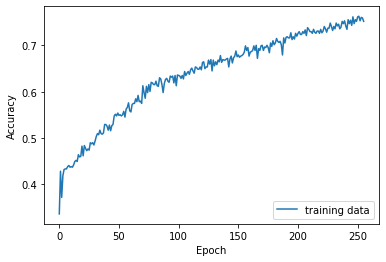

In [ ]:
print(history7.params)
plt.plot(history7.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
mydatax = np.zeros((811, 150,150, 3))
mydatay = np.zeros((811,150,150, 1))

mydatay_enc = np.zeros((811, 3))

mydata = np.zeros((811, 150, 150, 4))

mydatay_true = np.zeros((811))
count = 0
for x, y in my_augmented_image_generator:
  for j in range(len(x)):
    mydatax[count] = x[j]

    # Get true label 1 is true, 0 is false
    index = list(y[j]).index(1)
    mydatay[count] = mydatay[count]+ index

    mydatay_enc[count][index - 1] = mydatay_enc[count][index - 1] + 1

    mydatay_true[count] = index

    mydata[count, :, :, :3] += mydatax[count]
    mydata[count, :, :, 1] = np.reshape(mydatay[count], (150, 150))

    count = count + 1
  if count >= 811:
    break

In [ ]:
modeloverfit = 0

**Overfitting the model by passing Output as input**

In [ ]:

modeloverfit = Sequential()

modeloverfit.add( Conv2D( 16, ( 4, 4 ), activation = 'relu', input_shape = mydata[0, :, :, :].shape ) )
modeloverfit.add( MaxPool2D(4, 4) )
modeloverfit.add( Conv2D( 8, ( 4, 4 ), activation = 'relu' ) )
modeloverfit.add( MaxPool2D(4, 4) )
modeloverfit.add( Flatten() )
modeloverfit.add( Dense( 6, activation = 'relu' ) )
modeloverfit.add( Dense( 3, activation = 'softmax' ) )

In [ ]:
modeloverfit.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_35 (Conv2D)          (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 36, 36, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 33, 33, 8)         2056      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 8, 8, 8)          0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 512)               0         
                                                                 
 dense_28 (Dense)            (None, 6)               

In [ ]:
modeloverfit.compile( optimizer = 'adam', loss = 'categorical_crossentropy', metrics = [ 'accuracy' ] )
historyy = modeloverfit.fit(mydata, mydatay_tenc,epochs = 128, batch_size = 32 )

Epoch 1/128
26/26 [==============================] - 1s 22ms/step - loss: 0.8653 - accuracy: 0.6473
Epoch 2/128
26/26 [==============================] - 1s 20ms/step - loss: 0.2794 - accuracy: 0.9236
Epoch 3/128
26/26 [==============================] - 1s 20ms/step - loss: 0.0667 - accuracy: 0.9679
Epoch 4/128
26/26 [==============================] - 0s 19ms/step - loss: 0.0371 - accuracy: 0.9901
Epoch 5/128
26/26 [==============================] - 0s 19ms/step - loss: 0.0349 - accuracy: 0.9840
Epoch 6/128
26/26 [==============================] - 0s 19ms/step - loss: 0.0208 - accuracy: 0.9938
Epoch 7/128
26/26 [==============================] - 0s 18ms/step - loss: 0.0136 - accuracy: 0.9963
Epoch 8/128
26/26 [==============================] - 1s 20ms/step - loss: 0.0071 - accuracy: 0.9988
Epoch 9/128
26/26 [==============================] - 0s 19ms/step - loss: 0.0063 - accuracy: 0.9988
Epoch 10/128
26/26 [==============================] - 1s 20ms/step - loss: 0.0054 - accuracy: 0.9988

Overfit model by passing Output as Input 

{'verbose': 1, 'epochs': 128, 'steps': 26}


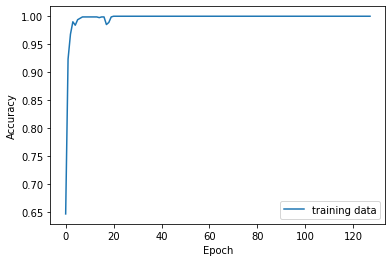

In [ ]:
print(historyy.params)
plt.plot(historyy.history['accuracy'])

plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()